In [1]:
import os
import pandas as pd
PATH = "../input/casualshirt/Kaggle_data/"
Shirt_dtls = "../input/casualshirt/Kaggle_data/selected_shirt.csv"
Labels = "../input/label-map/iMat_fashion_2018_label_map_228.csv"

In [2]:
df_labelIds = pd.read_csv(Shirt_dtls)
df_labelIds.drop(columns=["Unnamed: 0"],inplace=True)
df_labelIds.head(6)

,imageId,url,labelId
0,317,https://contestimg.wish.com/api/webimage/5482d...,"['38', '106', '153', '105', '128']"
1,735,https://contestimg.wish.com/api/webimage/56726...,"['38', '106', '53', '49', '164']"
2,844,https://contestimg.wish.com/api/webimage/53f00...,"['38', '106', '53', '214', '164', '138']"
3,995,https://contestimg.wish.com/api/webimage/54311...,"['38', '19', '106', '59', '49', '164', '138']"
4,1046,https://contestimg.wish.com/api/webimage/5416f...,"['38', '106', '214', '42', '105', '138']"
5,1085,https://contestimg.wish.com/api/webimage/54389...,"['38', '106', '137', '214', '105', '138']"


In [3]:
df_labels = pd.read_csv(Labels)
df_labels.head(6)

,labelId,taskId,labelName,taskName
0,1,6,Argyle,pattern
1,2,9,Asymmetric,style
2,3,1,Athletic Pants,category
3,4,1,Athletic Sets,category
4,5,1,Athletic Shirts,category
5,6,1,Athletic Shorts,category


In [4]:
import re
lst = []
for i in df_labelIds.labelId:
    lst.append([int(s) for s in re.findall(r'\b\d+\b', i)])
df_labelIds['idInt'] = lst

In [5]:
df_labelIds.drop(columns=["labelId"],inplace=True)
df_labelIds.head()

,imageId,url,idInt
0,317,https://contestimg.wish.com/api/webimage/5482d...,"[38, 106, 153, 105, 128]"
1,735,https://contestimg.wish.com/api/webimage/56726...,"[38, 106, 53, 49, 164]"
2,844,https://contestimg.wish.com/api/webimage/53f00...,"[38, 106, 53, 214, 164, 138]"
3,995,https://contestimg.wish.com/api/webimage/54311...,"[38, 19, 106, 59, 49, 164, 138]"
4,1046,https://contestimg.wish.com/api/webimage/5416f...,"[38, 106, 214, 42, 105, 138]"


In [6]:
from sklearn.preprocessing import MultiLabelBinarizer
mlid = MultiLabelBinarizer()
label_id = mlid.fit_transform(df_labelIds.idInt)
print(list(mlid.classes_))
len(mlid.classes_)

[1, 2, 9, 13, 14, 17, 19, 20, 25, 28, 29, 35, 38, 42, 44, 49, 53, 54, 59, 63, 70, 73, 75, 77, 78, 79, 87, 99, 105, 106, 107, 111, 115, 117, 125, 128, 131, 132, 133, 137, 138, 140, 142, 143, 144, 147, 148, 149, 150, 151, 153, 154, 155, 158, 159, 164, 166, 167, 168, 171, 173, 175, 176, 178, 180, 181, 182, 184, 192, 194, 199, 204, 205, 209, 210, 214, 216, 218, 219, 222, 224, 225, 226, 228]


84

In [7]:
columns=list(mlid.classes_)
results_df=pd.DataFrame(label_id, columns=columns)
results_df['imageId']=df_labelIds['imageId']
results_df['idInt']=df_labelIds['idInt']
ordered_cols=['imageId','idInt']+columns
results_df=results_df[ordered_cols]#To get the same column order
results_df.head()

,imageId,idInt,1,2,9,13,14,17,19,20,...,210,214,216,218,219,222,224,225,226,228
0,317,"[38, 106, 153, 105, 128]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,735,"[38, 106, 53, 49, 164]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,844,"[38, 106, 53, 214, 164, 138]",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,995,"[38, 19, 106, 59, 49, 164, 138]",0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1046,"[38, 106, 214, 42, 105, 138]",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [8]:
#Find the 30 top sub-categories
results_df1=results_df.iloc[:,-84:]
results_df1.sum(axis = 0, skipna = True).sort_values(ascending = False).head(30)

38     5268
106    5268
53     2696
105    2655
164    2494
153    2421
138    2108
49     1592
214    1000
17      956
222     881
19      454
78      333
148     256
128     186
79      176
42      165
132     155
63      132
205     124
137     122
181     119
131     104
218      97
226      94
59       77
70       63
142      48
171      46
209      46
dtype: int64

In [9]:
temp_list = []
sel_labelIds = [38, 106, 105, 164, 153, 138, 49, 214, 17, 222]
#                53, 19, 78, 148, 128, 79, 42, 132, 63, 205, 137, 181, 131, 218]
for i in df_labelIds.idInt:
    temp = []
    for j in range(len(i)):
        if i[j] in sel_labelIds:
            temp.append(df_labels.labelName.loc[df_labels['labelId'] == i[j]].reset_index(drop=True).to_string().strip('0    '))
    temp_list.append(temp)

In [10]:
df_labelIds['LabelName'] = temp_list

In [11]:
df_labelIds['imageName'] = [str(i)+'.jpg' for i in df_labelIds['imageId']]

df_labelIds.head()

,imageId,url,idInt,LabelName,imageName
0,317,https://contestimg.wish.com/api/webimage/5482d...,"[38, 106, 153, 105, 128]","[Casual Shirts, Male, Round Neck, Long Sleeved]",317.jpg
1,735,https://contestimg.wish.com/api/webimage/56726...,"[38, 106, 53, 49, 164]","[Casual Shirts, Male, Collared, Short Sleeves]",735.jpg
2,844,https://contestimg.wish.com/api/webimage/53f00...,"[38, 106, 53, 214, 164, 138]","[Casual Shirts, Male, V-Necks, Short Sleeves, ...",844.jpg
3,995,https://contestimg.wish.com/api/webimage/54311...,"[38, 19, 106, 59, 49, 164, 138]","[Casual Shirts, Male, Collared, Short Sleeves,...",995.jpg
4,1046,https://contestimg.wish.com/api/webimage/5416f...,"[38, 106, 214, 42, 105, 138]","[Casual Shirts, Male, V-Necks, Long Sleeved, P...",1046.jpg


In [12]:
df=df_labelIds[['imageName','LabelName']]
df.head()

,imageName,LabelName
0,317.jpg,"[Casual Shirts, Male, Round Neck, Long Sleeved]"
1,735.jpg,"[Casual Shirts, Male, Collared, Short Sleeves]"
2,844.jpg,"[Casual Shirts, Male, V-Necks, Short Sleeves, ..."
3,995.jpg,"[Casual Shirts, Male, Collared, Short Sleeves,..."
4,1046.jpg,"[Casual Shirts, Male, V-Necks, Long Sleeved, P..."


In [13]:
actual_img=pd.DataFrame()
actual_img['imageName']=list(os.listdir(PATH))
actual_img.head()

,imageName
0,261552.jpg
1,282687.jpg
2,838698.jpg
3,121151.jpg
4,822017.jpg


In [14]:
df_new = pd.merge(df, actual_img, on='imageName', how='inner')
len(df_new)

5025

In [15]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
outclass = mlb.fit_transform(df_new.LabelName)
print(list(mlb.classes_))
len(mlb.classes_)
#print(outclass)
#mlb.inverse_transform(outclass)

['Black', 'Casual Shirts', 'Collared', 'Long Sleeved', 'Male', 'Printed', 'Round Neck', 'Short Sleeves', 'V-Necks', 'White']


10

In [16]:
df_new.to_csv("Updated_Selected_Shirts.csv")

In [17]:
from keras.models import Sequential
"""Import from keras_preprocessing not from keras.preprocessing, because Keras may or maynot contain the features discussed here depending upon when you read this article, until the keras_preprocessed library is updated in Keras use the github version."""
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
import cv2 as cv

Using TensorFlow backend.


In [18]:
datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

train_generator=datagen.flow_from_dataframe(dataframe=df_new[:4300],directory=PATH, x_col="imageName",
                                            y_col="LabelName",batch_size=32,seed=42,shuffle=True,
                                            class_mode="categorical",classes=list(mlb.classes_),target_size=(224,224))
valid_generator=test_datagen.flow_from_dataframe(dataframe=df_new[4300:5000],directory=PATH, x_col="imageName",
                                            y_col="LabelName",batch_size=32,seed=42,shuffle=True,
                                            class_mode="categorical",classes=list(mlb.classes_),target_size=(224,224))
test_generator=test_datagen.flow_from_dataframe(dataframe=df_new[5000:],directory=PATH, x_col="imageName",
                                            batch_size=32,seed=42,shuffle=False,class_mode=None,target_size=(224,224))

Found 4300 validated image filenames belonging to 10 classes.
Found 700 validated image filenames belonging to 10 classes.
Found 25 validated image filenames.


In [19]:
from keras.applications import InceptionResNetV2

conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))

#from keras.applications.resnet50 import ResNet50, preprocess_input

#HEIGHT = 224
#WIDTH = 224

#conv_base = ResNet50(weights='imagenet', 
#                     include_top=False, 
#                     input_shape=(HEIGHT, WIDTH, 3))

219062272/219055592 [==============================] - 15s 0us/step


In [20]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes

In [21]:
#Lets see our model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 5, 5, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              39322624  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 93,669,610
Trainable params: 93,609,066
Non-trainable params: 60,544
_________________________________________________________________


In [22]:
print('Number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('Number of trainable weights after freezing the conv base:', len(model.trainable_weights))

Number of trainable weights before freezing the conv base: 492
Number of trainable weights after freezing the conv base: 4


In [23]:
#We'll use the RMSprop optimizer with a learning rate of 0.0001
#We'll use binary_crossentropy loss because its a binary classification
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])
#model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=2e-6, decay=1e-6, momentum=0.9, nesterov=True),
#              metrics=['acc'])
#model.compile(loss='binary_crossentropy', 
#              optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
#              metrics=['acc'])

In [24]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=20
)

Epoch 1/20
134/134 [==============================] - 49s 367ms/step - loss: 0.4979 - acc: 0.7523 - val_loss: 0.5594 - val_acc: 0.7751
Epoch 2/20
134/134 [==============================] - 33s 247ms/step - loss: 0.4339 - acc: 0.7929 - val_loss: 0.6494 - val_acc: 0.7716
Epoch 3/20
134/134 [==============================] - 33s 243ms/step - loss: 0.3976 - acc: 0.8132 - val_loss: 0.5861 - val_acc: 0.7858
Epoch 4/20
134/134 [==============================] - 32s 242ms/step - loss: 0.3742 - acc: 0.8264 - val_loss: 0.6236 - val_acc: 0.7713
Epoch 5/20
134/134 [==============================] - 32s 242ms/step - loss: 0.3489 - acc: 0.8421 - val_loss: 0.5924 - val_acc: 0.7835
Epoch 6/20
134/134 [==============================] - 33s 244ms/step - loss: 0.3260 - acc: 0.8549 - val_loss: 0.6362 - val_acc: 0.7726
Epoch 7/20
134/134 [==============================] - 33s 245ms/step - loss: 0.3045 - acc: 0.8643 - val_loss: 0.6098 - val_acc: 0.7615
Epoch 8/20
134/134 [==============================] - 3

In [25]:
#Save the model
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

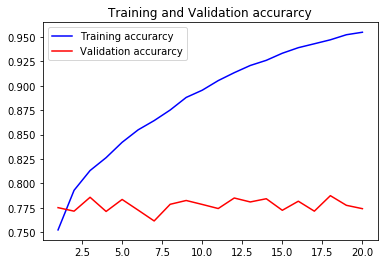

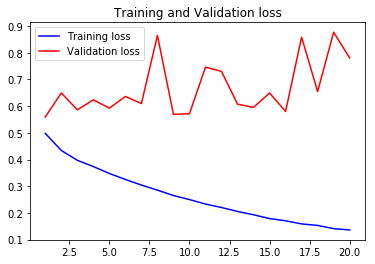

In [26]:
#lets plot the train and val curve
import matplotlib.pyplot as plt

#get the details form the history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [27]:
test_generator.reset()
pred=model.predict_generator(test_generator,verbose=1)

1/1 [==============================] - 6s 6s/step


In [28]:
pred_bool = (pred >0.5)

In [29]:
len(pred_bool)

25

In [30]:
predictions=[]
labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
print(labels)
predictions = pred_bool.astype(int)

{0: 'Black', 1: 'Casual Shirts', 2: 'Collared', 3: 'Long Sleeved', 4: 'Male', 5: 'Printed', 6: 'Round Neck', 7: 'Short Sleeves', 8: 'V-Necks', 9: 'White'}


In [31]:
columns=list(mlb.classes_)
#columns should be the same order of y_col
results=pd.DataFrame(predictions, columns=columns)
results["Filenames"]=test_generator.filenames
ordered_cols=["Filenames"]+columns
results=results[ordered_cols]#To get the same column order
results.to_csv("results.csv",index=False)

In [32]:
test_generator.reset()

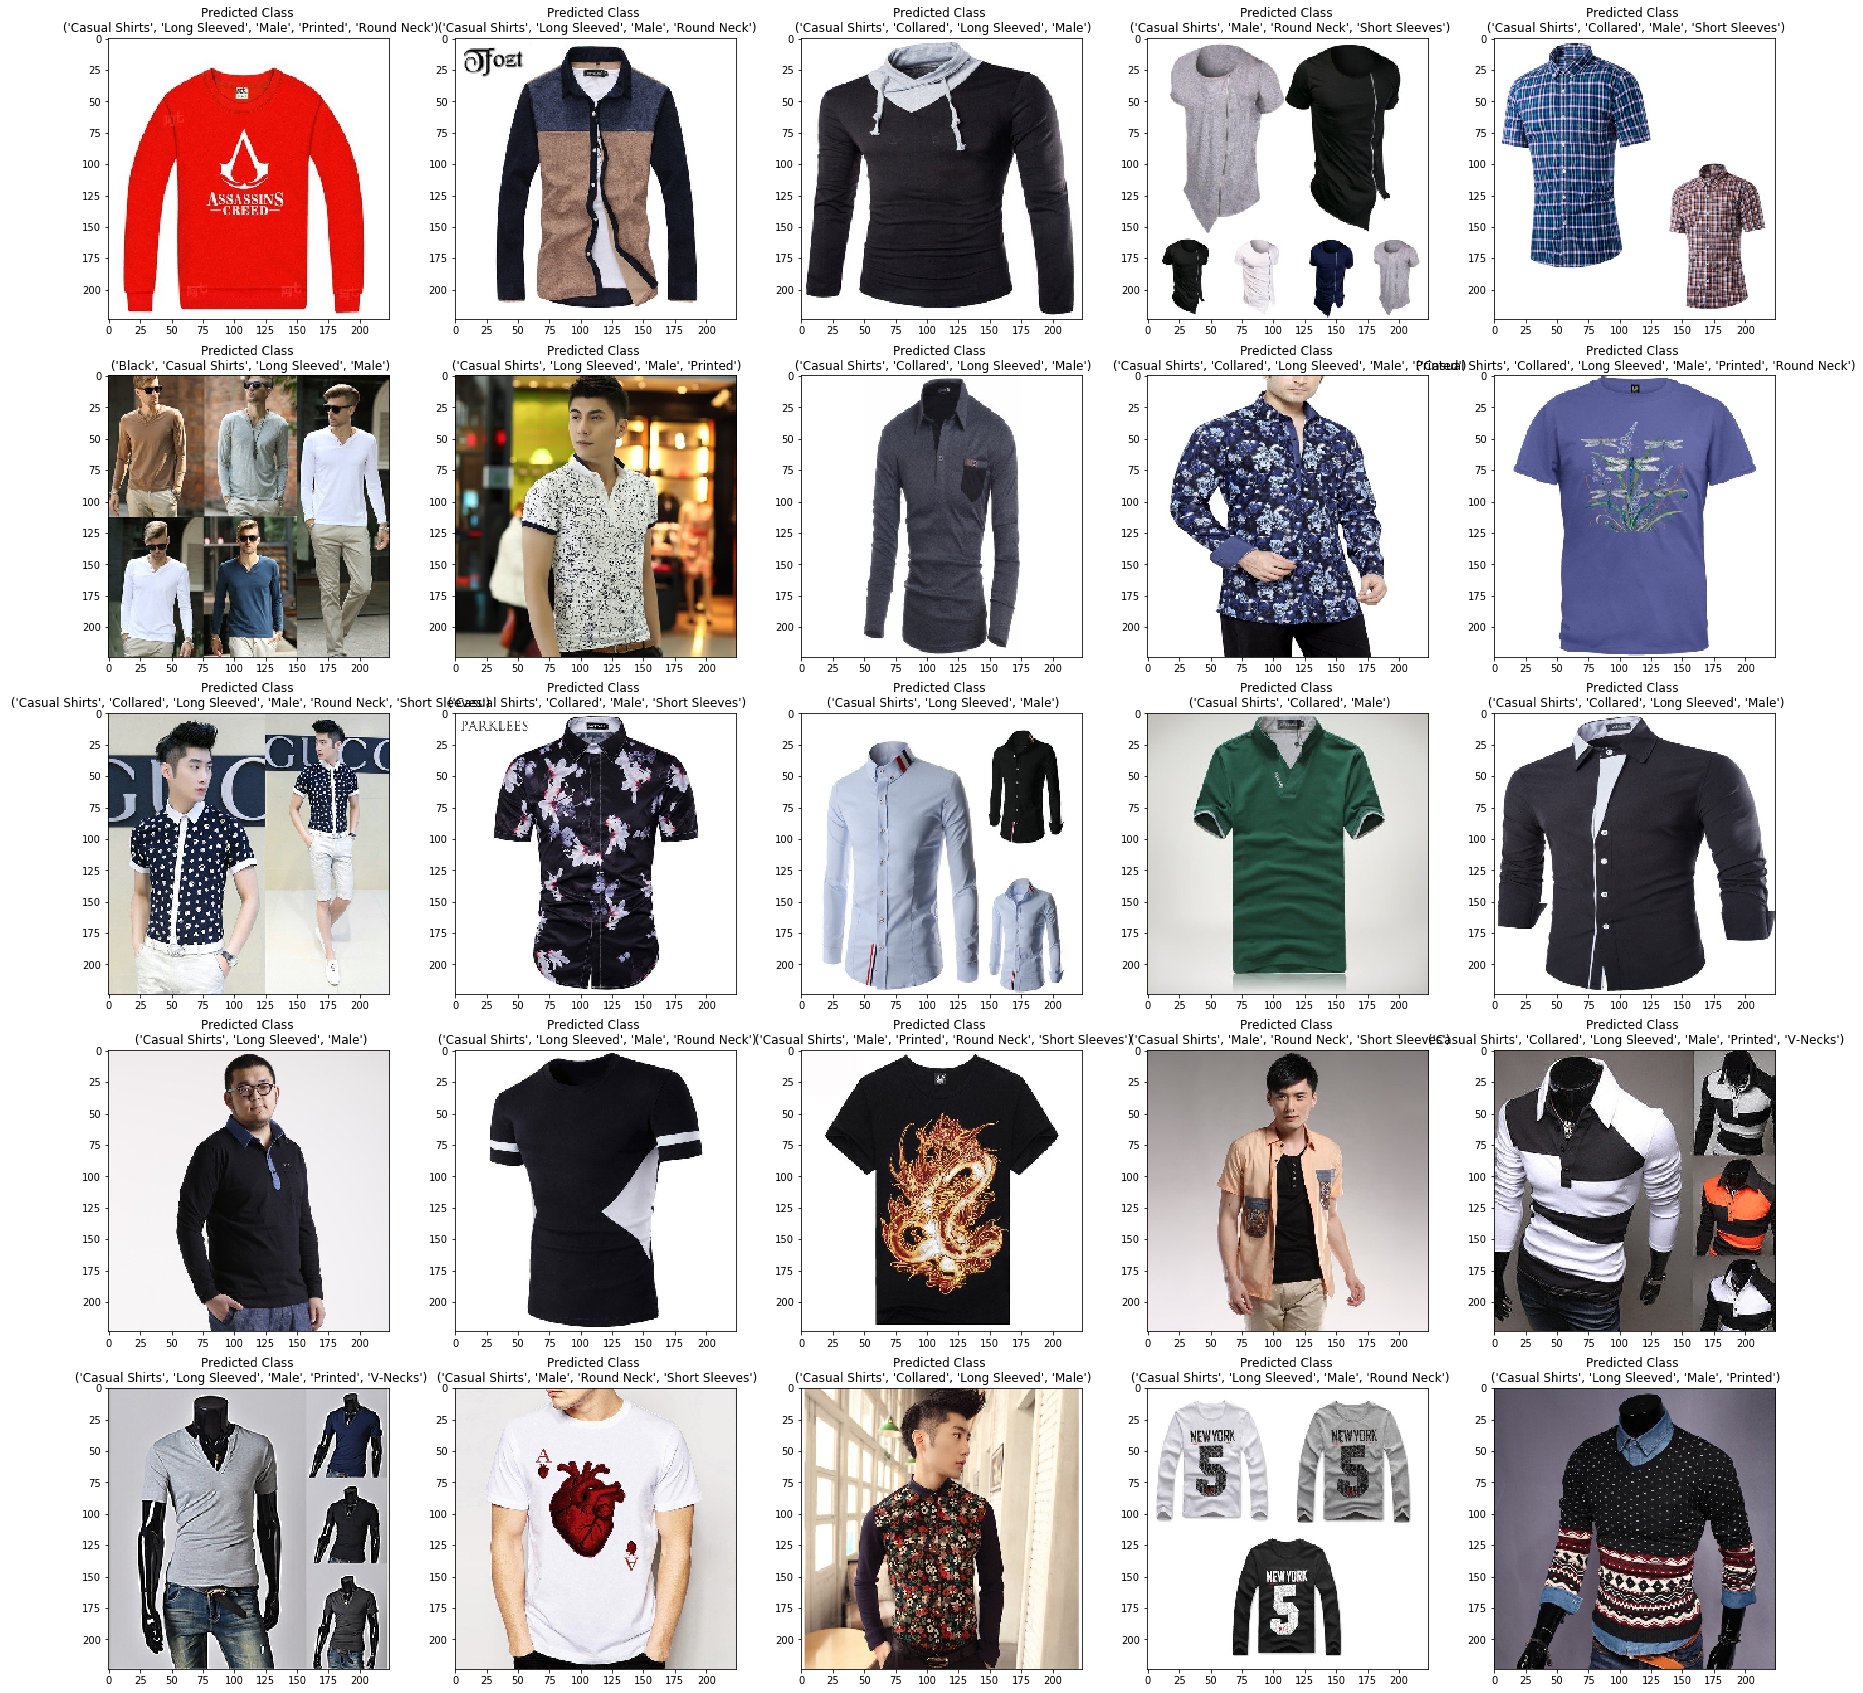

In [33]:
i = 0
plt.figure(figsize=(30,30))
pred=model.predict(test_generator)
predictions = (pred >0.5).astype(int)
text_labels=(mlb.inverse_transform(predictions))
actual_labels = list(df_new.LabelName[5000:])
    
for batch in test_generator:
    plt.subplot(5, 5, 1+i)
    plt.title("Predicted Class \n " + str(text_labels[i]))
    imgplot = plt.imshow(batch[i])
    i += 1
    if i % 25 == 0:
        break
plt.show()
